# Experimentos baseados em Deep Learning

- Utilizando cada paredão como teste e avaliando com holdout.

In [1]:
import pandas as pd 
import numpy as np 
from regression_utils import *
import fastai
from fastai.tabular import *

In [2]:
NORMALIZE = False
EPOCHS = 30
LAYERS = [15, 15]
LR = 1e-4
DEVICE="TODO"

In [3]:
summary_df = pd.DataFrame(columns=COLUMNS)

# Paredao 1

In [4]:
train_df, test_df = get_train_test(1, normalize=NORMALIZE)

In [5]:
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594


In [6]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [7]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [8]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.436301,0.421721,0.421721,00:00
1,0.428938,0.405065,0.405065,00:00
2,0.416127,0.320659,0.320659,00:00
3,0.430898,0.285115,0.285115,00:00
4,0.451106,0.342436,0.342436,00:00
5,0.431558,0.373565,0.373565,00:00
6,0.412423,0.278182,0.278182,00:00
7,0.412550,0.259292,0.259292,00:00
8,0.401106,0.238721,0.238721,00:00
9,0.407113,0.243129,0.243129,00:00


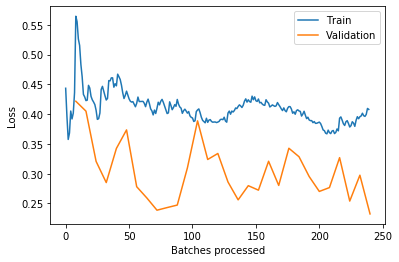

In [9]:
learner.recorder.plot_losses()

In [10]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [11]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [12]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594,-0.113263
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446,-0.113485


# Paredao 2

In [13]:
train_df, test_df = get_train_test(2, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863


In [14]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [15]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [16]:
learner.fit_one_cycle(EPOCHS, LR)


epoch,train_loss,valid_loss,mean_squared_error,time
0,0.238391,0.233084,0.233084,00:00
1,0.254111,0.200877,0.200877,00:00
2,0.292142,0.290013,0.290013,00:00
3,0.301051,0.432856,0.432856,00:00
4,0.307824,0.245816,0.245816,00:00
5,0.299303,0.273284,0.273284,00:00
6,0.312989,0.251779,0.251779,00:00
7,0.327026,0.311734,0.311734,00:00
8,0.313474,0.255971,0.255971,00:00
9,0.301165,0.115519,0.115519,00:00


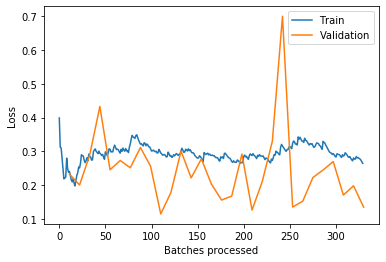

In [17]:
learner.recorder.plot_losses()

In [18]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [19]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [20]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,0.081757
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.073054
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,-0.237785
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,-0.363238


# Paredao 3

In [21]:
train_df, test_df = get_train_test(3, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971


In [22]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [23]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [24]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.361978,0.019198,0.019198,00:00
1,0.388296,0.121047,0.121047,00:00
2,0.405198,0.403664,0.403664,00:00
3,0.365768,0.111277,0.111277,00:00
4,0.381987,0.416349,0.416349,00:00
5,0.391652,0.299073,0.299073,00:00
6,0.463496,0.165442,0.165442,00:00
7,0.439835,0.324908,0.324908,00:00
8,0.417813,0.238598,0.238598,00:00
9,0.395845,0.490120,0.490120,00:00


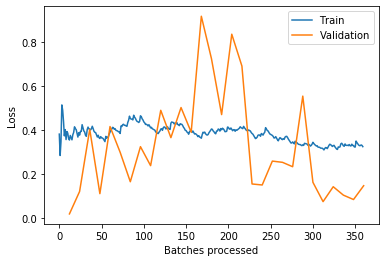

In [25]:
learner.recorder.plot_losses()

In [26]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [27]:

test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [28]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971,0.912743
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029,0.192331


# Paredao 4

In [29]:
train_df, test_df = get_train_test(4, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
26,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130
27,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608
28,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262


In [30]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [31]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.518267,0.438648,0.438648,00:00
1,0.548355,0.562961,0.562961,00:00
2,0.482263,0.630596,0.630596,00:00
3,0.489741,0.689304,0.689304,00:00
4,0.532108,0.675424,0.675424,00:00
5,0.549680,0.720639,0.720639,00:00
6,0.528720,0.564177,0.564177,00:00
7,0.543981,0.764088,0.764088,00:00
8,0.543507,0.687963,0.687963,00:00
9,0.525865,0.711147,0.711147,00:00


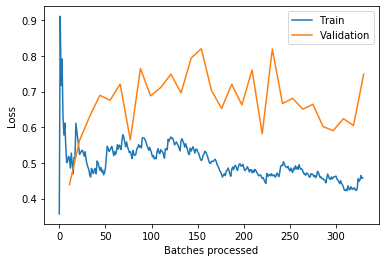

In [32]:
learner.recorder.plot_losses()

In [33]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [34]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [35]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
28,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262,-0.219144
27,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608,-0.225626
26,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130,-0.303368


# Paredao 5

In [36]:
train_df, test_df = get_train_test(5, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927


In [37]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [38]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.266991,0.008646,0.008646,00:00
1,0.380486,0.011500,0.011500,00:00
2,0.413709,0.050604,0.050604,00:00
3,0.403155,0.106612,0.106612,00:00
4,0.398515,0.057934,0.057934,00:00
5,0.399198,0.060476,0.060476,00:00
6,0.369976,0.025359,0.025359,00:00
7,0.326267,0.107088,0.107088,00:00
8,0.334594,0.514126,0.514126,00:00
9,0.300595,0.166511,0.166511,00:00


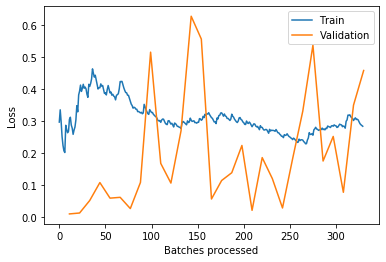

In [39]:
learner.recorder.plot_losses()

In [40]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [41]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [42]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927,0.856358
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764,0.142999
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309,-0.005182


# Paredao 6

In [43]:
train_df, test_df = get_train_test(6, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329


In [44]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [45]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.870811,0.276856,0.276856,00:00
1,0.883243,0.415037,0.415037,00:00
2,0.906243,0.481650,0.481650,00:00
3,0.967974,0.728188,0.728188,00:00
4,0.959591,1.157710,1.157710,00:00
5,1.002128,1.061599,1.061599,00:00
6,1.031066,0.759095,0.759095,00:00
7,0.954432,0.702425,0.702425,00:00
8,0.972157,0.895775,0.895775,00:00
9,0.896798,1.506259,1.506259,00:00


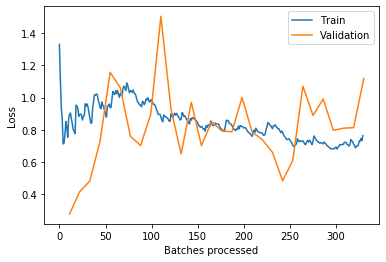

In [46]:
learner.recorder.plot_losses()

In [47]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [48]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [49]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607,-0.154441
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064,-1.006966
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329,-1.205810


# Paredao 7

In [50]:
train_df, test_df = get_train_test(7, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522


In [51]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [52]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.556691,0.489822,0.489822,00:00
1,0.609410,0.536580,0.536580,00:00
2,0.659042,0.528790,0.528790,00:00
3,0.604716,0.446033,0.446033,00:00
4,0.590582,0.562468,0.562468,00:00
5,0.555797,0.391231,0.391231,00:00
6,0.570578,0.316744,0.316744,00:00
7,0.544137,0.313410,0.313410,00:00
8,0.577952,0.274568,0.274568,00:00
9,0.561637,0.410028,0.410028,00:00


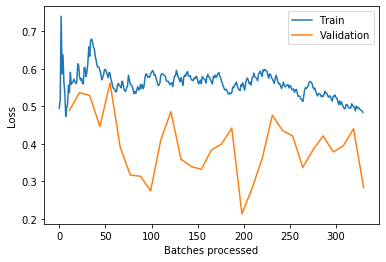

In [53]:
learner.recorder.plot_losses()

In [54]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [55]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [56]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460,0.442271
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522,-0.108433
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018,-0.408798



# Paredao 8

In [57]:
train_df, test_df = get_train_test(8, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170


In [58]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [59]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.581540,0.478096,0.478096,00:00
1,0.530609,0.482992,0.482992,00:00
2,0.500616,0.538239,0.538239,00:00
3,0.564893,0.475056,0.475056,00:00
4,0.582767,0.539371,0.539371,00:00
5,0.592136,0.656983,0.656983,00:00
6,0.591318,0.578970,0.578970,00:00
7,0.609032,0.596881,0.596881,00:00
8,0.592400,0.588663,0.588663,00:00
9,0.577389,0.747832,0.747832,00:00


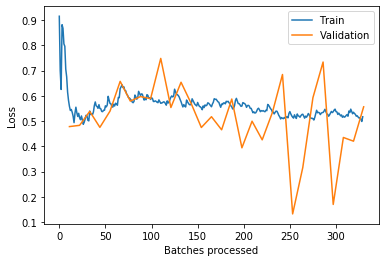

In [60]:
learner.recorder.plot_losses()

In [61]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [62]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [63]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771,-0.091794
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170,-0.206310
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059,-0.259911


# Paredão 9

In [64]:
train_df, test_df = get_train_test(9, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964


In [65]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [66]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.434518,0.179650,0.179650,00:00
1,0.335595,0.253250,0.253250,00:00
2,0.323916,0.387530,0.387530,00:00
3,0.338842,0.393469,0.393469,00:00
4,0.347494,0.425546,0.425546,00:00
5,0.411385,0.406142,0.406142,00:00
6,0.375560,0.425431,0.425431,00:00
7,0.411425,0.552360,0.552360,00:00
8,0.390597,0.591294,0.591294,00:00
9,0.406558,0.489754,0.489754,00:00


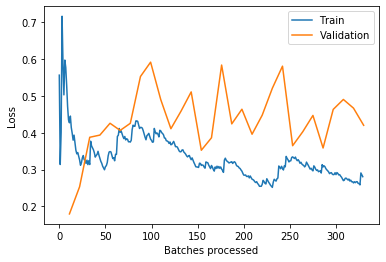

In [67]:
learner.recorder.plot_losses()

In [68]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [69]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [70]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082,0.133233
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964,0.086689
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954,0.082414


# Paredão 10

In [71]:
train_df, test_df = get_train_test(10, normalize=NORMALIZE)
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673


In [72]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [73]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.215234,0.113896,0.113896,00:00
1,0.486550,0.132607,0.132607,00:00
2,0.410147,0.189634,0.189634,00:00
3,0.384665,0.167112,0.167112,00:00
4,0.381859,0.159864,0.159864,00:00
5,0.386169,0.150065,0.150065,00:00
6,0.424153,0.249938,0.249938,00:00
7,0.401608,0.189364,0.189364,00:00
8,0.362683,0.192153,0.192153,00:00
9,0.359126,0.179045,0.179045,00:00


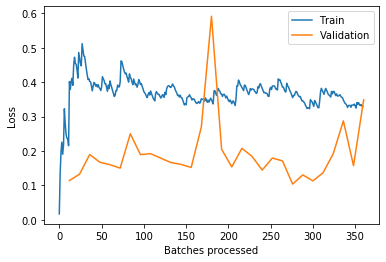

In [74]:
learner.recorder.plot_losses()

In [75]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [76]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [77]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251,6.250821
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673,3.977419
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076,-0.063895


# Sumarizando

In [78]:
summary_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
0,1,bianca_andrade,5102,5230,3762,0.361998,0.371080,0.266922,0.483052,0.326345,0.207010,5849,5903,2342,407879,57730,411880,0.2446,-0.113485
1,1,lucas_chumbo,5460,10796,14411,0.178042,0.352040,0.469919,0.516948,0.673655,0.792990,22759,5502,2406,667691,132858,12014,0.7594,-0.113263
2,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,0.081757
3,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,-0.237785
4,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.073054
5,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,-0.363238
6,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.546440,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029,0.192331
7,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.453560,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971,0.912743
8,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130,-0.303368
9,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608,-0.225626
